In [192]:
# Importing all necessary libraries
import os 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from tensorflow.keras.optimizers import Adam

In [193]:
cat_dirs = ['C:/Users/basha/Downloads/test/cats']
dog_dirs = ['C:/Users/basha/Downloads/test/dogs']


In [194]:
# Function to load images
# Function to load images
def load_image(paths, label):
    images = []
    labels = []
    
    for folder in paths:
        print(f"Looking for images in: {folder}")
        
        if not os.path.exists(folder):
            print(f"Error: The folder {folder} does not exist.")
            continue
        
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img).astype('uint8')
                images.append(img_array)
                labels.append(label)
                
            else:
                print(f"Skipping file {img_path} - Unsupported format.")

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [195]:
# Load cat and dog images
cat_img, cat_label = load_image(cat_dirs, 0)
dog_img, dog_label = load_image(dog_dirs, 1)

Looking for images in: C:/Users/basha/Downloads/test/cats
Looking for images in: C:/Users/basha/Downloads/test/dogs


In [196]:
# Concatenating images and labels
X = np.concatenate((cat_img, dog_img), axis=0)
y = np.concatenate((cat_label, dog_label), axis=0)

In [197]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3333, random_state=42, stratify=y_test)


In [198]:
model = Sequential([

    # Input Layer
    Input(shape=(224, 224, 3)),

    # Convolutional Layer 1
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Convolutional Layer 2
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Convolutional Layer 3
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Convolutional Layer 4
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully Connected Layer (Neural Network)
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    

    # Output Layer
    Dense(1, activation='sigmoid')
])

In [199]:
# في الشبكات العصبية الالتفافية (CNN)
# نحتاج إلى طريقة تساعد النموذج على التعلم وتحسين أدائه أثناء التدريب، وهنا يأتي دور المُحسِّن (Optimizer).

# شرح الكود ببساطة:
# هذا الكود يستخدم مُحسِّن آدم (Adam Optimizer) للمساعدة في تحديث الأوزان داخل الشبكة العصبية، مما يجعلها تتعلم بشكل أكثر كفاءة.

# 🔹 لماذا نستخدم "آدم" في CNN؟
# ✅ سريع: يعمل بكفاءة حتى مع البيانات الكبيرة والصور المعقدة.
# ✅ يتكيف مع البيانات: يعدل معدل التعلم تلقائيًا حسب الحاجة.
# ✅ يقلل الأخطاء بسرعة: يساعد النموذج في الوصول إلى أفضل نتيجة دون الحاجة لضبط معدل التعلم يدويًا.

# 📌 باختصار: هذا الكود يجعل النموذج يتعلم بطريقة ذكية وسريعة، مما يساعده على تصنيف الصور بدقة عالية. 🚀
# Compile the model with Adam optimizer

learning_rate = 1e-3
model.compile(optimizer=Adam(learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [200]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [201]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=62,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.4432 - loss: 420.9146 - val_accuracy: 0.5714 - val_loss: 20.1425
Epoch 2/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.5006 - loss: 100.3787 - val_accuracy: 0.4286 - val_loss: 1.7403
Epoch 3/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.4871 - loss: 9.2041 - val_accuracy: 0.4286 - val_loss: 0.7671
Epoch 4/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.4620 - loss: 1.3012 - val_accuracy: 0.4286 - val_loss: 0.7278
Epoch 5/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.5219 - loss: 0.8735 - val_accuracy: 0.4286 - val_loss: 0.7171
Epoch 6/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.5267 - loss: 0.7142 - val_accuracy: 0.4286 - val_loss: 0.7177
Epoch 7/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.5460 - loss: 0.7009 - val_accuracy: 0.4286 - val_loss: 0.7074
Epoch 8/62
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.4885 - loss: 0.6951 - val_accuracy: 0.4286 - val_

In [202]:
# Save the trained model
model.save("my_cnn_model.h5")

In [203]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [204]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary')
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print("\nClass-wise metrics:")
class_report = classification_report(y_test, y_pred, target_names=['cat', 'dog'])
print(class_report)

Accuracy: 0.5
Recall: 0.0
Precision: 0.0
F1 Score: 0.0

Class-wise metrics:
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67         7
         dog       0.00      0.00      0.00         7

    accuracy                           0.50        14
   macro avg       0.25      0.50      0.33        14
weighted avg       0.25      0.50      0.33        14



C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\basha\AppD

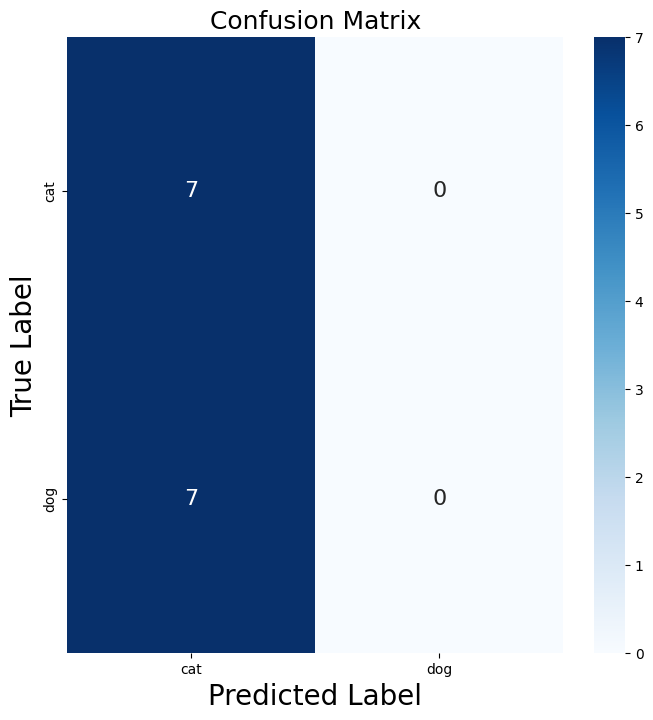

In [205]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['cat', 'dog'], 
                 yticklabels=['cat', 'dog'], 
                 annot_kws={"size": 16}, cbar=True, 
                 vmin=0, vmax=np.max(cm))

plt.title('Confusion Matrix', fontsize=18)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [206]:
mdl = tf.keras.models.load_model('my_cnn_model.h5')

In [207]:
def prepare_image(image_path):
    # Load the image from the given path
    img = image.load_img(image_path, target_size=(224, 224))  # Change the size to match your model's input size
    img_array = image.img_to_array(img)  # Convert the image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array = img_array / 255.0  # Normalize the image (if you did it during training)
    return img_array

In [208]:
def predict_image(image_path):
    img_array = prepare_image(image_path)
    prediction = mdl.predict(img_array)
    
    # Assuming the model output is a probability, you can threshold it
    if prediction[0] > 0.5:
        return "Dog"
    else:
        return "Cat"

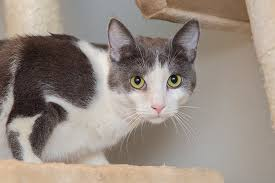
this is the cat used to be predicted

In [209]:
result = predict_image("C:\\Users\\basha\\OneDrive\\Desktop\\cat.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Cat
